In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Генерирование реализаций марковских цепей

## 1. Дискретное случайное блуждание

Дискретное случайное блуждание на $\mathbb{Z}$ - это марковская цепь $X = (X_n)_{n \in \mathbb{N}}$ с пространством состояний $E = \mathbb{Z}$ и вероятностями перехода 
$$
p_{i, i+1} = p, \qquad p_{i, i-1} = 1 - p, \qquad i \in \mathbb{Z}.
$$

Сгенерировать траекторию случайного блуждания можно, представив $X_n$ в виде суммы Бернуллиевских случайных величин $\xi_1 + \ldots + \xi_n$, где $P(\xi_k = 1) = p, P(\xi_k = -1) = 1-p$.

In [27]:
p = 0.5
T = 200
U = np.random.uniform(size=T)
xi = np.zeros_like(U)
xi[U > p] = +1
xi[U < p] = -1
rw = np.cumsum(xi)

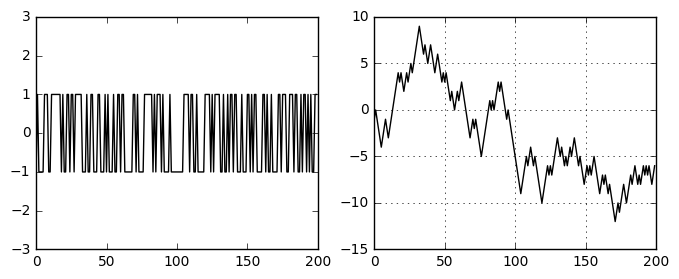

In [28]:
figure(figsize=(8, 3))
subplot(1, 2, 1)
plot(xi, 'k')
ylim([-3, 3])
subplot(1, 2, 2)
plot(rw, 'k')
grid('on')

## 2. Дискретное случайное блуждание с поглощающими экранами

Допустим, что множество состояний марковской цепи конечно: $S = {-k, -k + 1, \ldots, -1, 0, 1, \ldots, k}$. 

Если $P(X_n = k | X_{n-1} = k) = 1$, $P(X_n = -k | X_{n-1} = k) = 1$, такая цепь описывает случайное блуждание с поглощающими экранами на уровнях $k$ и $-k$. Цепь, попадая в состояния $k$ и $-k$, никогда из них не выходит.

In [37]:
k = 5

p = 0.5
T = 200
U = np.random.uniform(size=T)
xi = np.zeros_like(U)
xi[U > p] = +1
xi[U < p] = -1

rw = np.zeros_like(U)
for i in xrange(1, T):
    if np.abs(rw[i - 1]) >= k:
        rw[i] = rw[i - 1]
    else:
        rw[i] = rw[i - 1] + xi[i]

(-6, 6)

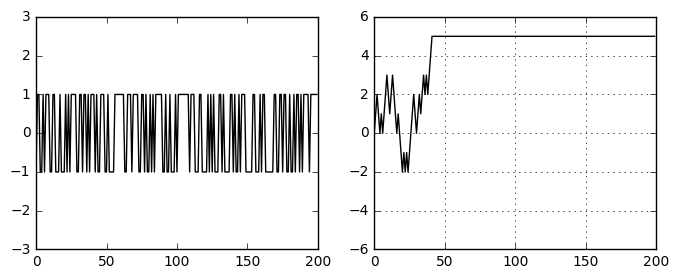

In [38]:
figure(figsize=(8, 3))
subplot(1, 2, 1)
plot(xi, 'k')
ylim([-3, 3])
subplot(1, 2, 2)
plot(rw, 'k')
grid('on')
ylim([-k - 1, k + 1])

## 3. Дискретное случайное блуждание с отражающими экранами

Допустим, что множество состояний марковской цепи конечно: $S = {-k, -k + 1, \ldots, -1, 0, 1, \ldots, k}$. 

Если $P(X_n = k | X_{n-1} = k) = 0$, $P(X_n = -k | X_{n-1} = k) = 0$, такая цепь описывает случайное блуждание с отражающими экранами на уровнях $k$ и $-k$. Цепь, попадая в состояния $k$ и $-k$, сразу из них выходит.

In [49]:
k = 5

p = 0.5
T = 200
U = np.random.uniform(size=T)
xi = np.zeros_like(U)
xi[U > p] = +1
xi[U < p] = -1

rw = np.zeros_like(U)
for i in xrange(1, T):
    if np.abs(rw[i - 1]) >= k:
        rw[i] = rw[i - 1] - np.copysign(1, rw[i - 1])
    else:
        rw[i] = rw[i - 1] + xi[i]

(-6, 6)

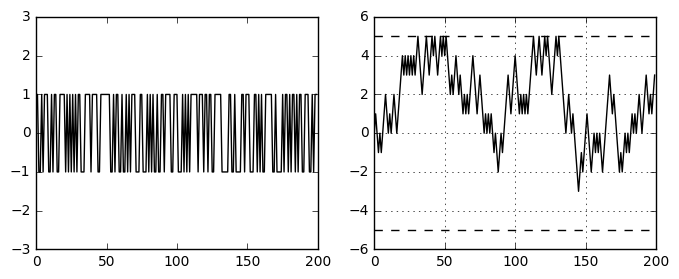

In [52]:
figure(figsize=(8, 3))
subplot(1, 2, 1)
plot(xi, 'k')
ylim([-3, 3])
subplot(1, 2, 2)
plot(rw, 'k')
grid('on')
plot(np.arange(T), k * np.ones_like(xi), 'k--')
plot(np.arange(T), -k * np.ones_like(xi), 'k--')
ylim([-k - 1, k + 1])